## **Librerías**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [3]:
from datetime import datetime, timedelta

In [4]:
import sys
sys.path.append('./')
sys.path.append('../')

In [5]:
from Utils.functions import thousands_formatter, graph_histogram, adjust_decimal_format

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, accuracy_score, recall_score

In [7]:
# from pycaret.classification import *

## **Variables Globales**

In [8]:
dia = int(str(datetime.now()).replace('-', '')[:8])
mes = int(str(datetime.now()).replace('-', '')[:6])

## **Datos**

In [9]:
df_train = pd.read_csv('../Data/Raw/abt_prueba_train.csv', sep='|')

C:\Users\jmart\AppData\Local\Temp\ipykernel_24040\3399716307.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('../Data/Raw/abt_prueba_train.csv', sep='|')


In [10]:
df_validation = pd.read_csv('../Data/Raw/validation1.csv', sep='|')

## **Exploración**

### **Dataset de Entrenamiento**

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179340 entries, 0 to 179339
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NU_CTE           179340 non-null  int64  
 1   conteo           179340 non-null  int64  
 2   EDAD             179340 non-null  int64  
 3   Salario_final    179340 non-null  object 
 4   SCORE_CLEAR      179340 non-null  int64  
 5   MANTIENE_NOM     179340 non-null  object 
 6   max_con          179340 non-null  int64  
 7   tasa_ofertada    179340 non-null  object 
 8   cliente digital  179340 non-null  object 
 9   sum_op_digital   179340 non-null  object 
 10  mean_importe     147380 non-null  object 
 11  m_consultas      147380 non-null  object 
 12  m_monetarias     147380 non-null  object 
 13  m_nomonetarias   147380 non-null  object 
 14  CROSS_SELL       174398 non-null  float64
 15  ACTIVO           174543 non-null  float64
 16  PASIVO           174543 non-null  floa

#### **Limpieza de variables**

In [13]:
df_train['tasa_ofertada'] = adjust_decimal_format(df_train['tasa_ofertada'])
df_train['sum_op_digital'] = adjust_decimal_format(df_train['sum_op_digital'])
df_train['mean_importe'] = adjust_decimal_format(df_train['mean_importe'])
df_train['m_consultas'] = adjust_decimal_format(df_train['m_consultas'])
df_train['m_monetarias'] = adjust_decimal_format(df_train['m_monetarias'])
df_train['m_nomonetarias'] = adjust_decimal_format(df_train['m_monetarias'])
df_train['tasa_contratada'] = adjust_decimal_format(df_train['tasa_contratada'])
df_train['Salario_final'] = adjust_decimal_format(df_train['Salario_final'])

In [14]:
df_train['EDAD'] = df_train['EDAD'].apply(lambda x: int(x))

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179340 entries, 0 to 179339
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NU_CTE           179340 non-null  int64  
 1   conteo           179340 non-null  int64  
 2   EDAD             179340 non-null  int64  
 3   Salario_final    179340 non-null  float64
 4   SCORE_CLEAR      179340 non-null  int64  
 5   MANTIENE_NOM     179340 non-null  object 
 6   max_con          179340 non-null  int64  
 7   tasa_ofertada    179340 non-null  float64
 8   cliente digital  179340 non-null  object 
 9   sum_op_digital   179340 non-null  float64
 10  mean_importe     179340 non-null  float64
 11  m_consultas      179340 non-null  float64
 12  m_monetarias     179340 non-null  float64
 13  m_nomonetarias   179340 non-null  float64
 14  CROSS_SELL       174398 non-null  float64
 15  ACTIVO           174543 non-null  float64
 16  PASIVO           174543 non-null  floa

#### **Detalle de cada característica**

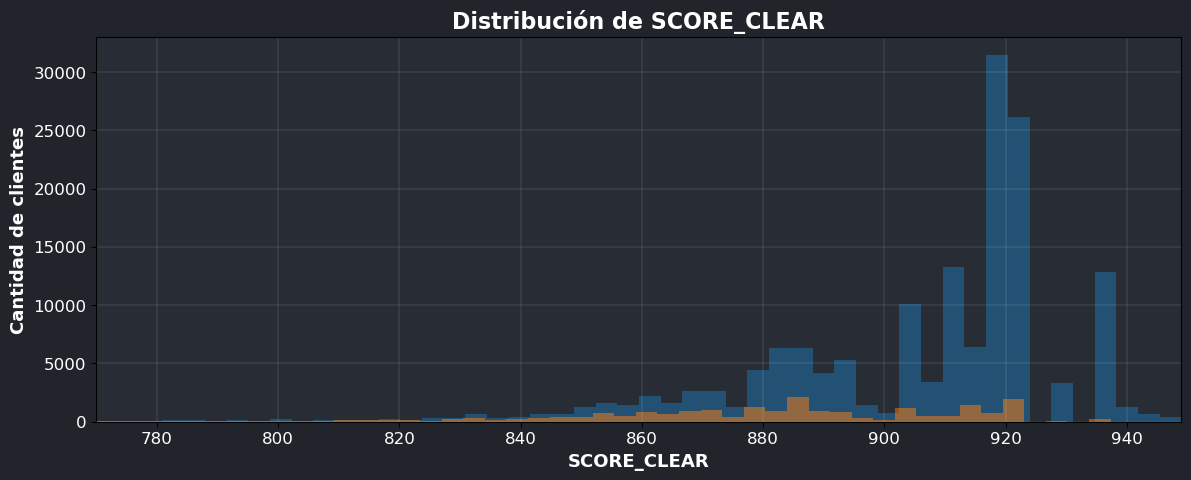

In [16]:
graph_histogram(
    df=df_train,
    column='SCORE_CLEAR', 
    n_bins=50
)

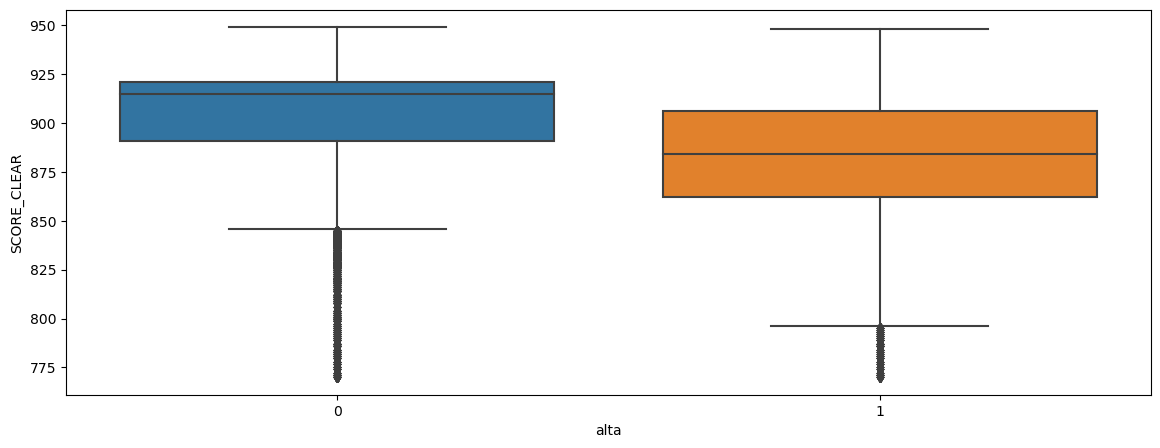

In [51]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.boxplot(
    x=df_train['alta'],
    y=df_train['SCORE_CLEAR'],
    # fliersize=0
)

plt.show()

Los que toman el crédito tienen score más bajo

In [17]:
pd.DataFrame(
    round(df_train['MANTIENE_NOM'].value_counts(normalize=True)*100, 2)
)

,proportion
MANTIENE_NOM,
SI,80.77
NO,19.23


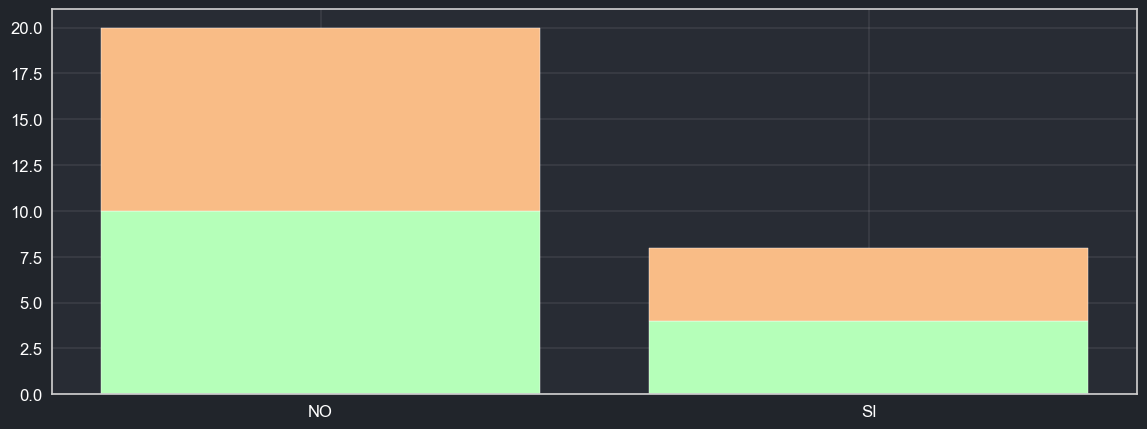

In [19]:
fig, ax = plt.subplots(figsize=(14, 5))

# plt.title(f'Distribución de {df[column].name}', size=16, color='white', weight=700)

plt.grid(visible=True, linewidth=0.1, color='white')
fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

r = list(df_train['MANTIENE_NOM'].unique())

plt.bar(
    r, 
    [10, 4], 
    color='#b5ffb9',
    edgecolor='white', 
    # width=barWidth
)

plt.bar(
    r, 
    [10, 4], 
    color='#f9bc86',
    bottom=[10,4],
    edgecolor='white', 
    # width=barWidth
)

# plt.xlabel(f'{df[column].name}', size=13, weight=700, color='white')
plt.xticks(color='white', size=12)

# plt.ylabel(f'Cantidad de clientes', size=13, weight=700, color='white')
plt.yticks(color='white', size=12)

plt.show()

In [20]:
df_train.groupby(['alta', 'MANTIENE_NOM'])[['NU_CTE']].count().reset_index()

,alta,MANTIENE_NOM,NU_CTE
0,0,NO,33159
1,0,SI,124757
2,1,NO,1321
3,1,SI,20103


In [21]:
categories = df_train['MANTIENE_NOM'].unique()
groups = df_train['alta'].unique()


In [22]:
heights = {category: np.zeros(len(groups)) for category in categories}
heights

{'NO': array([0., 0.]), 'SI': array([0., 0.])}

In [23]:
prueba = pd.crosstab(
    index=df_train['alta'],
    columns=df_train['MANTIENE_NOM'],
    values=df_train['NU_CTE'],
    aggfunc='count'
).reset_index()

prueba.columns = ['alta', 'No', 'Si']
prueba['%SI'] = round(prueba['Si']/(prueba['Si'] + prueba['No'])*100 ,2)
prueba['%NO'] = round(prueba['No']/(prueba['Si'] + prueba['No'])*100 ,2)
prueba = prueba[['alta', '%SI', '%NO']].transpose()
prueba


,0,1
alta,0.0,1.00
%SI,79.0,93.83
%NO,21.0,6.17


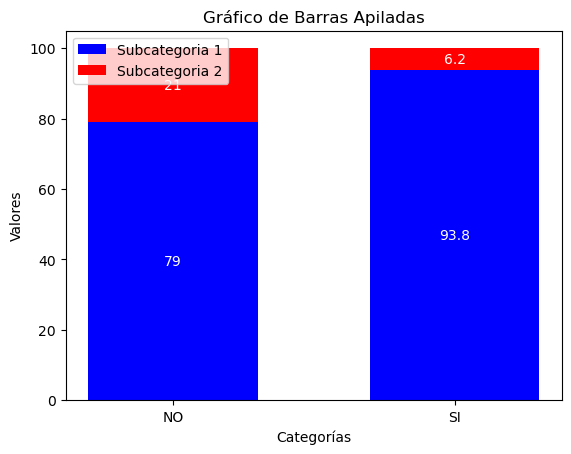

In [52]:
# Datos ficticios
categories = list(df_train['MANTIENE_NOM'].unique())
subcategories1 = [79, 93.8]
subcategories2 = [21, 6.2]

# Posiciones de las barras en el eje X
bar_width = 0.6
bar_positions = np.arange(len(categories))

# Crear el gráfico de barras apiladas
# plt.bar(bar_positions, subcategories1, bar_width, label='Subcategoria 1', color='blue')
# plt.bar(bar_positions, subcategories2, bar_width, bottom=subcategories1, label='Subcategoria 2', color='red')

p1 = plt.bar(
    bar_positions, 
    subcategories1, 
    bar_width, 
    label='Subcategoria 1', 
    color='blue'
)

p2 = plt.bar(
    bar_positions, 
    subcategories2, 
    bar_width, 
    bottom=subcategories1, 
    label='Subcategoria 2', 
    color='red'
)

for i in range(len(categories)):
    plt.text(
        bar_positions[i], 
        subcategories1[i] / 2, 
        str(subcategories1[i]), 
        ha='center', 
        va='center', 
        color='white'
    )
    
    plt.text(
        bar_positions[i], 
        subcategories1[i] + subcategories2[i] / 2, str(subcategories2[i]), 
        ha='center', 
        va='center', 
        color='white'
    )


# Etiquetas y título
plt.xlabel('Categorías')
plt.ylabel('Valores')
plt.title('Gráfico de Barras Apiladas')
plt.xticks(bar_positions, categories)
plt.legend()

# Mostrar el gráfico
plt.show()
# 

In [26]:
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
raw_data

{'greenBars': [20, 1.5, 7, 10, 5],
 'orangeBars': [5, 15, 5, 10, 15],
 'blueBars': [2, 15, 18, 5, 10]}

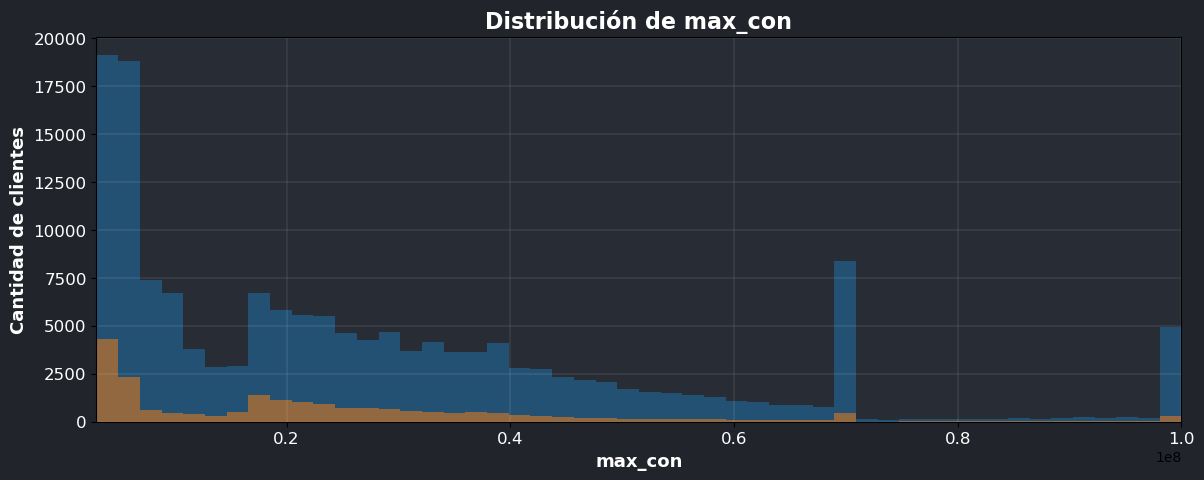

In [18]:
graph_histogram(
    df=df_train,
    column='max_con', 
    n_bins=50
)

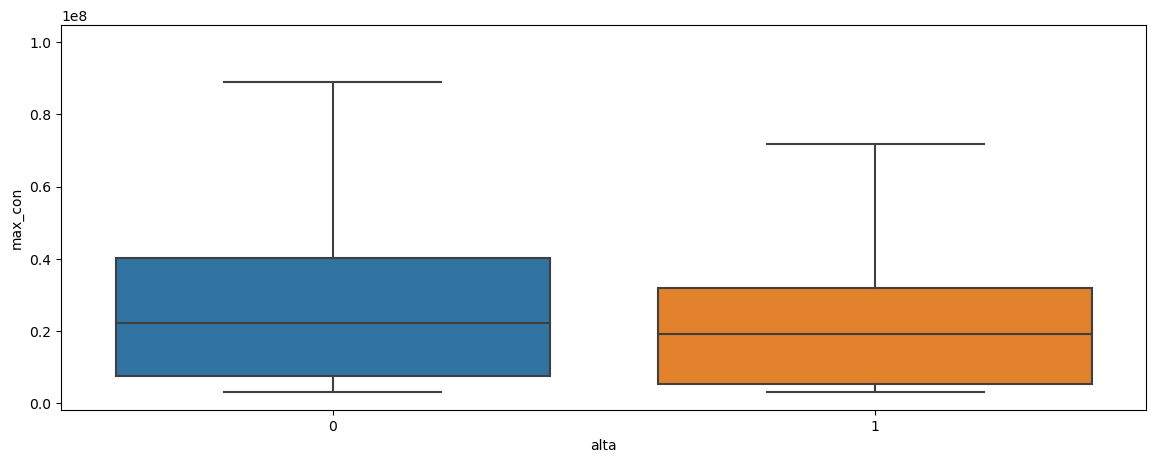

In [49]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.boxplot(
    x=df_train['alta'],
    y=df_train['max_con'],
    fliersize=0
)

plt.show()

Que curioso, los que toman el crédito tienen un menor monto disponible ofertado

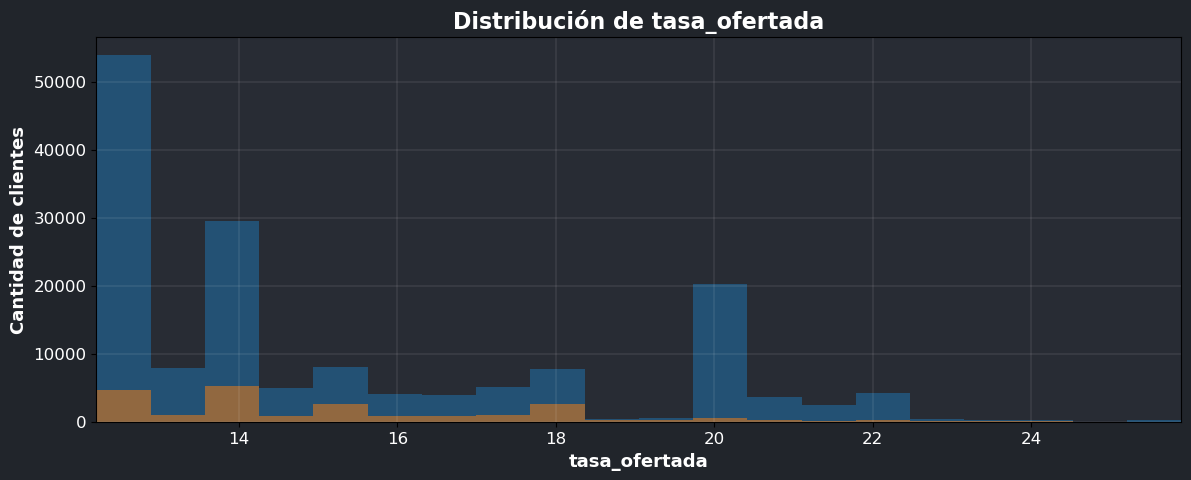

In [20]:
graph_histogram(
    df=df_train,
    column='tasa_ofertada', 
    n_bins=20
)

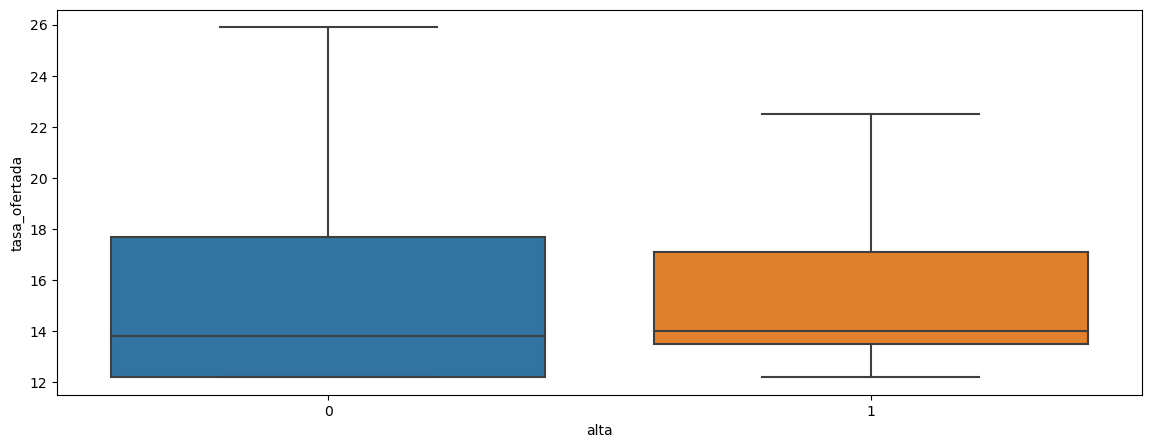

In [53]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.boxplot(
    x=df_train['alta'],
    y=df_train['tasa_ofertada'],
    fliersize=0
)

plt.show()

In [ ]:
pd.DataFrame(
    round(df_train['cliente digital'].value_counts(normalize=True)*100, 2)
)

,proportion
cliente digital,
si,81.57
no,18.43


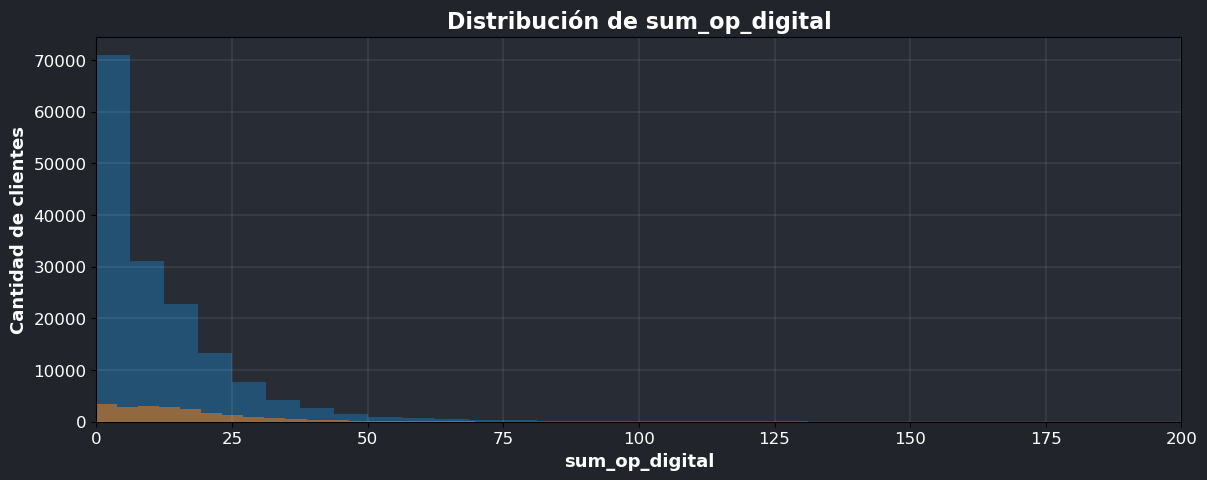

In [23]:
graph_histogram(
    df=df_train,
    column='sum_op_digital', 
    n_bins=120,
    max_value=200
)

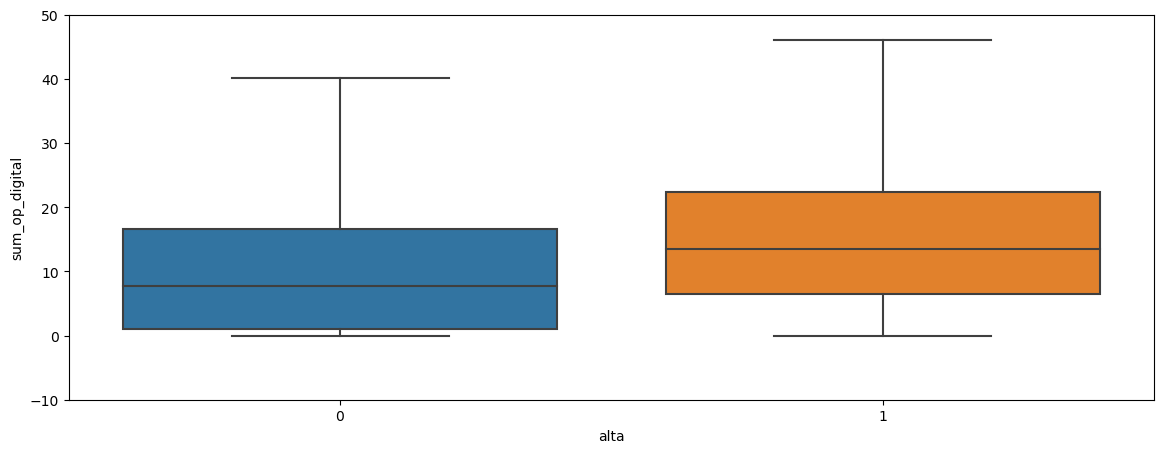

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.boxplot(
    x=df_train['alta'],
    y=df_train['sum_op_digital'],
    fliersize=0
)

plt.ylim(-10, 50)


plt.show()

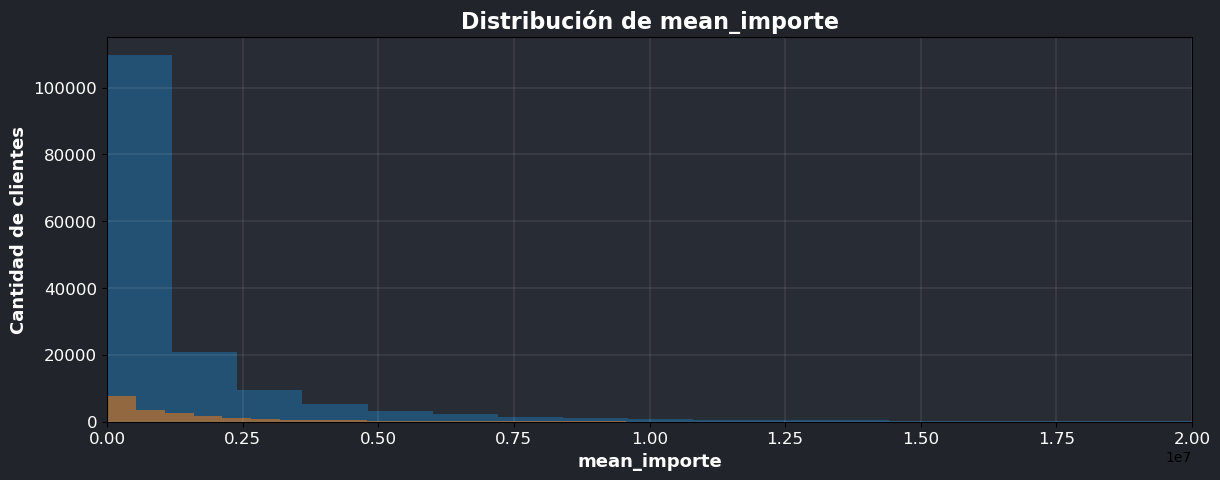

In [62]:
graph_histogram(
    df=df_train,
    column='mean_importe', 
    n_bins=200,
    max_value=20_000_000
)

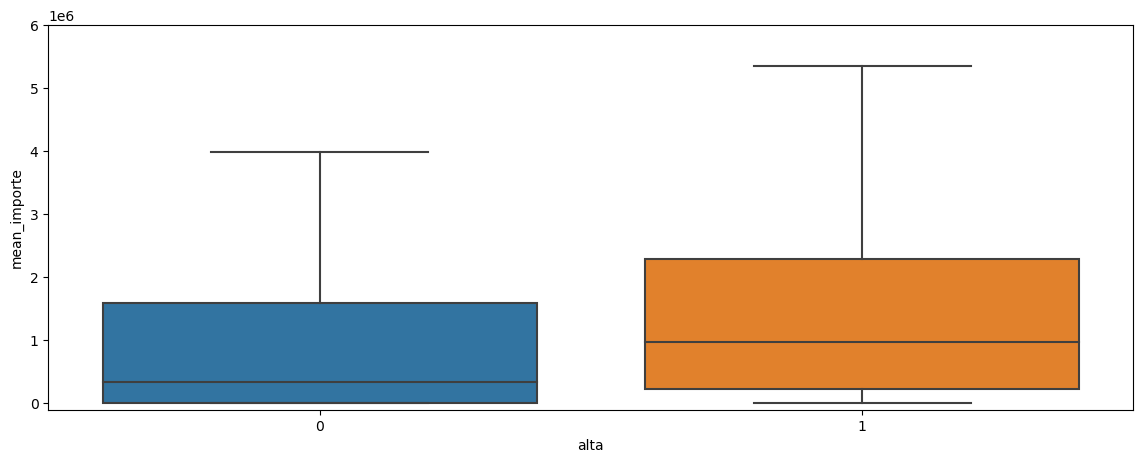

In [71]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.boxplot(
    x=df_train['alta'],
    y=df_train['mean_importe'],
    fliersize=0
)

plt.ylim(-100_000, 6_000_000)


plt.show()

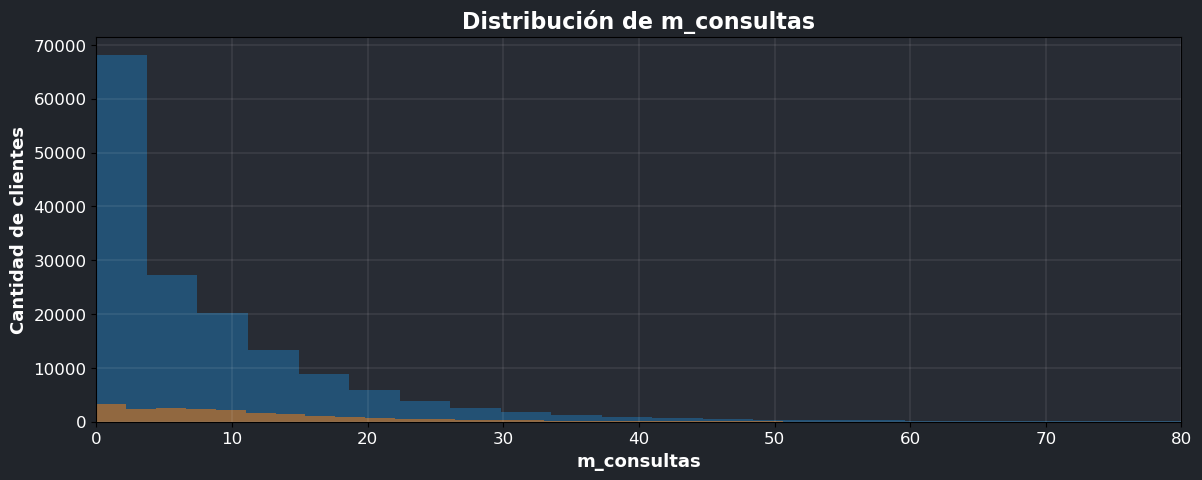

In [72]:
graph_histogram(
    df=df_train,
    column='m_consultas', 
    n_bins=200,
    max_value=80
)

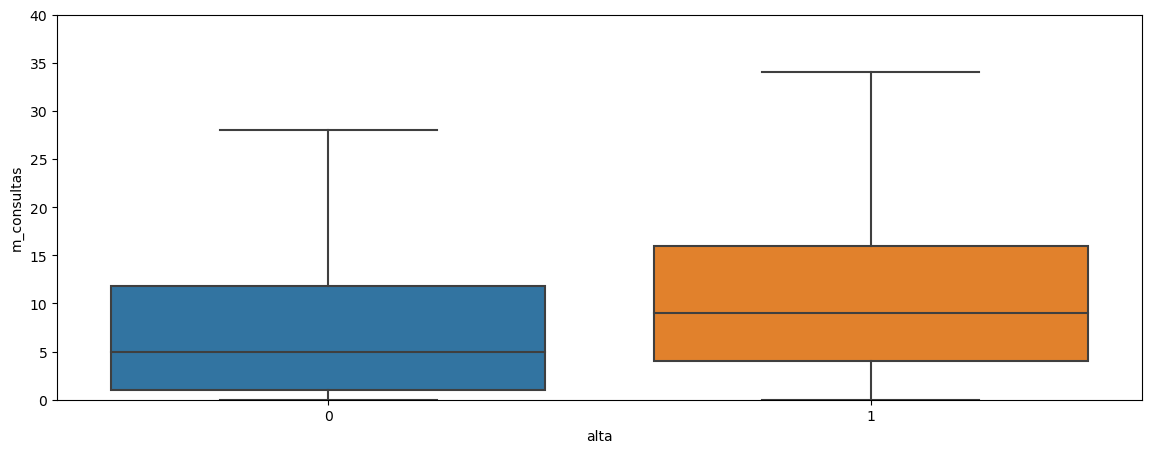

In [76]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.boxplot(
    x=df_train['alta'],
    y=df_train['m_consultas'],
    fliersize=0
)

plt.ylim(0, 40)

plt.show()

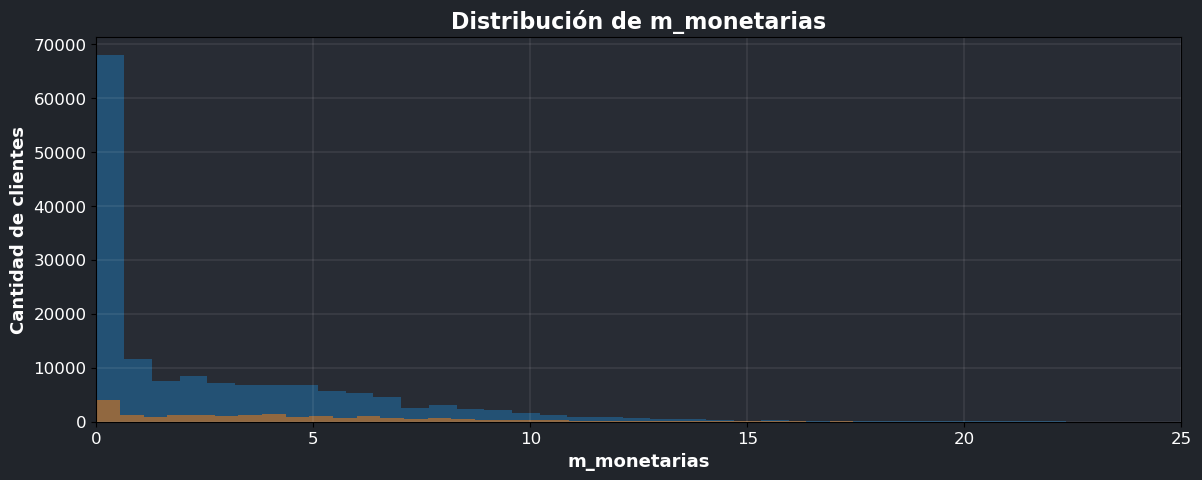

In [77]:
graph_histogram(
    df=df_train,
    column='m_monetarias', 
    n_bins=200,
    max_value=25
)

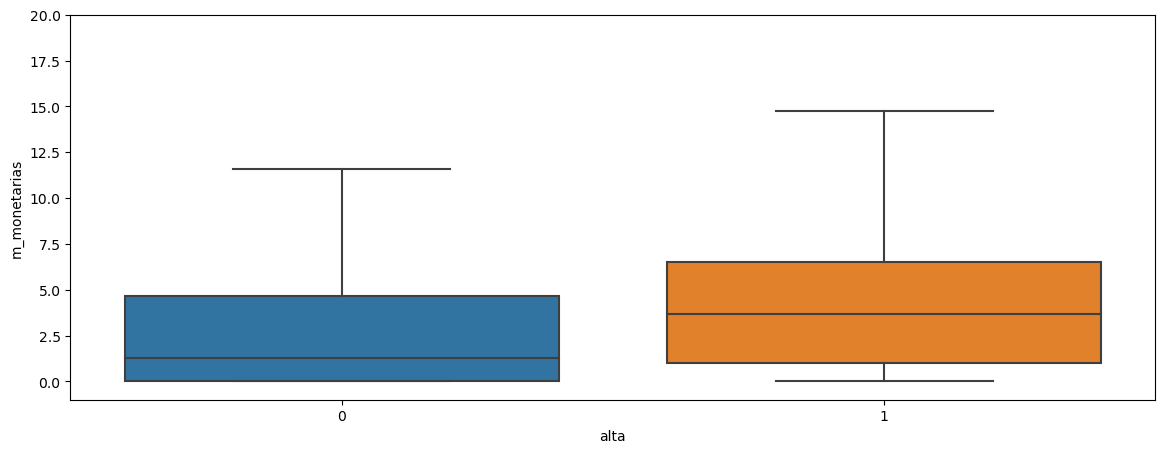

In [97]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.boxplot(
    x=df_train['alta'],
    y=df_train['m_monetarias'],
    fliersize=0
)

plt.ylim(-1, 20)

plt.show()

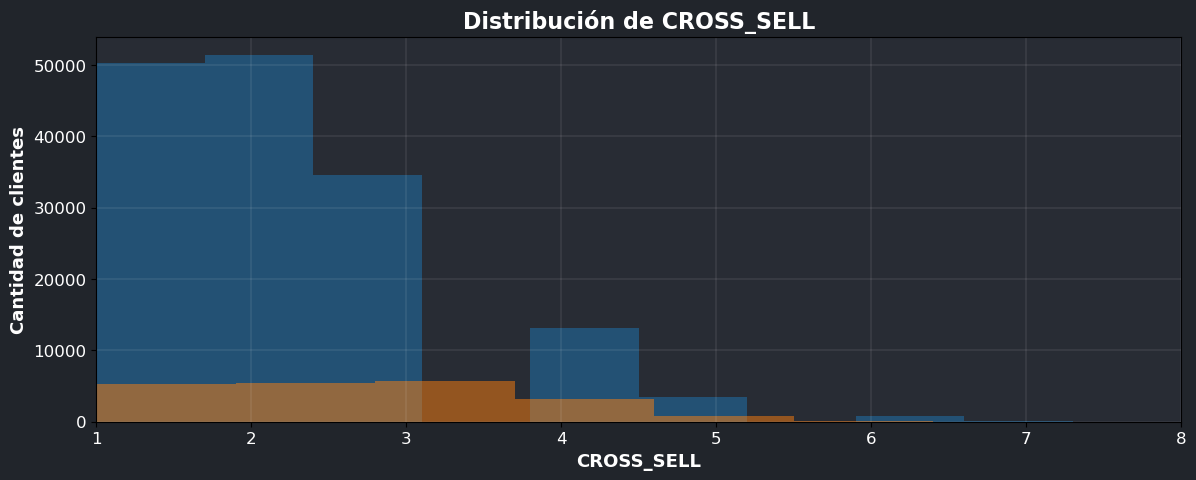

In [78]:
graph_histogram(
    df=df_train,
    column='CROSS_SELL', 
    n_bins=10,
    max_value=8
)

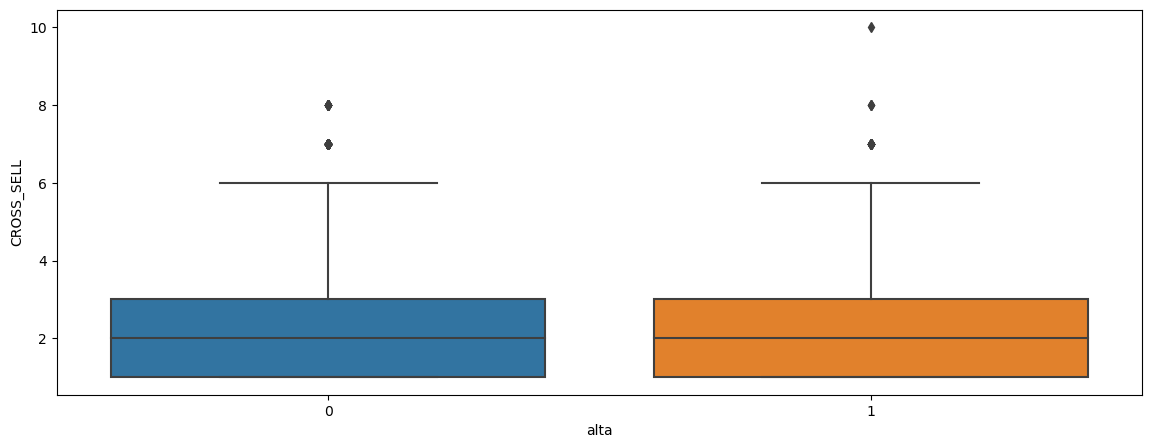

In [99]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.boxplot(
    x=df_train['alta'],
    y=df_train['CROSS_SELL'],
    # fliersize=0
)

# plt.ylim(-1, 20)

plt.show()

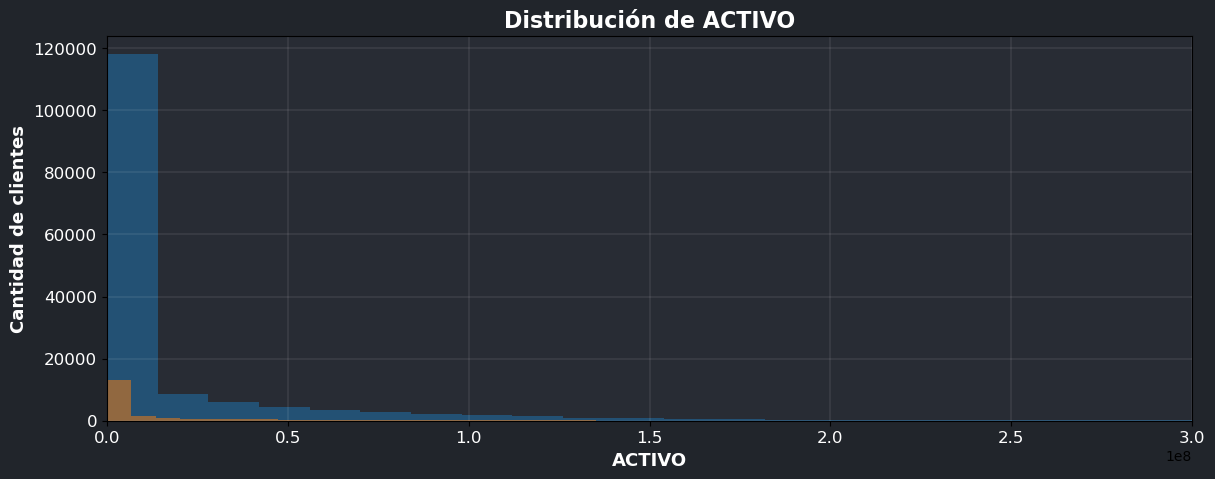

In [79]:
graph_histogram(
    df=df_train,
    column='ACTIVO', 
    n_bins=100,
    max_value=300_000_000
)

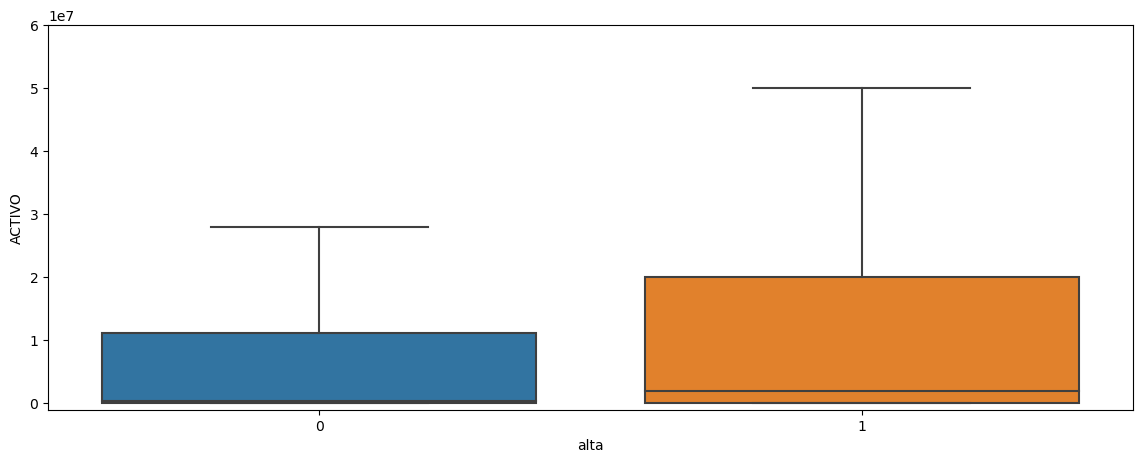

In [110]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.boxplot(
    x=df_train['alta'],
    y=df_train['ACTIVO'],
    fliersize=0
)

plt.ylim(-1_000_000, 60_000_000)

plt.show()

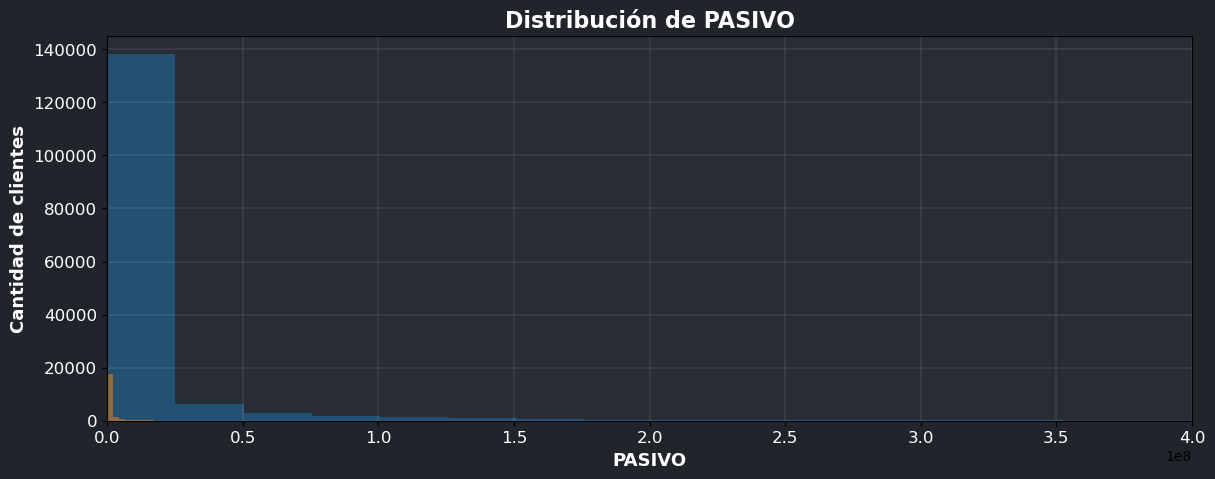

In [80]:
graph_histogram(
    df=df_train,
    column='PASIVO', 
    n_bins=200,
    max_value=400_000_000
)

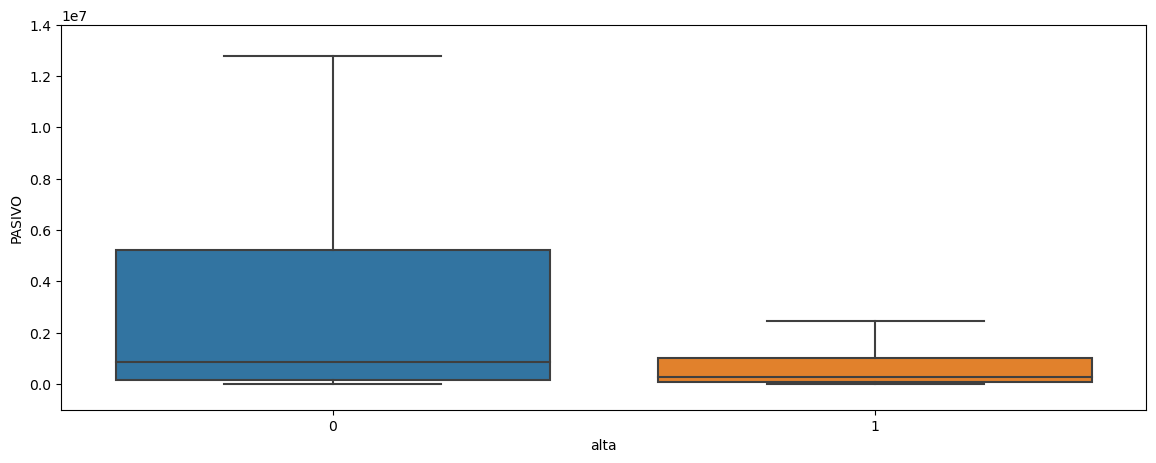

In [113]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.boxplot(
    x=df_train['alta'],
    y=df_train['PASIVO'],
    fliersize=0
)

plt.ylim(-1_000_000, 14_000_000)

plt.show()

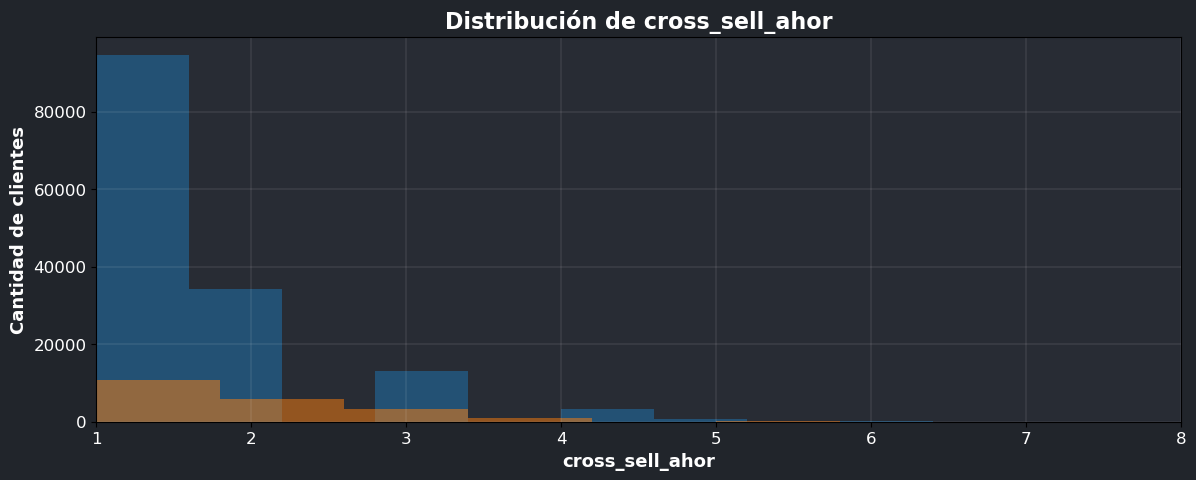

In [81]:
graph_histogram(
    df=df_train,
    column='cross_sell_ahor', 
    n_bins=10,
    max_value=8
)

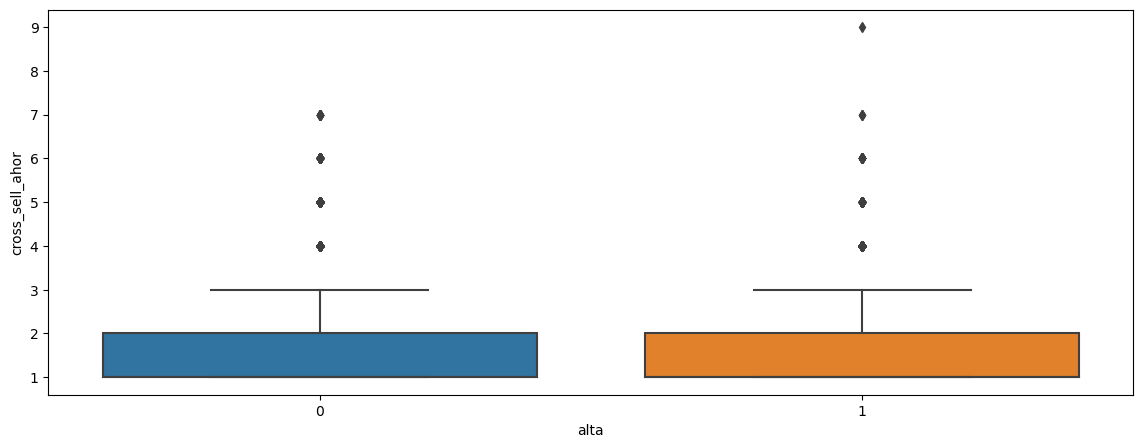

In [115]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.boxplot(
    x=df_train['alta'],
    y=df_train['cross_sell_ahor'],
    # fliersize=0
)

# plt.ylim(-1_000_000, 60_000_000)

plt.show()

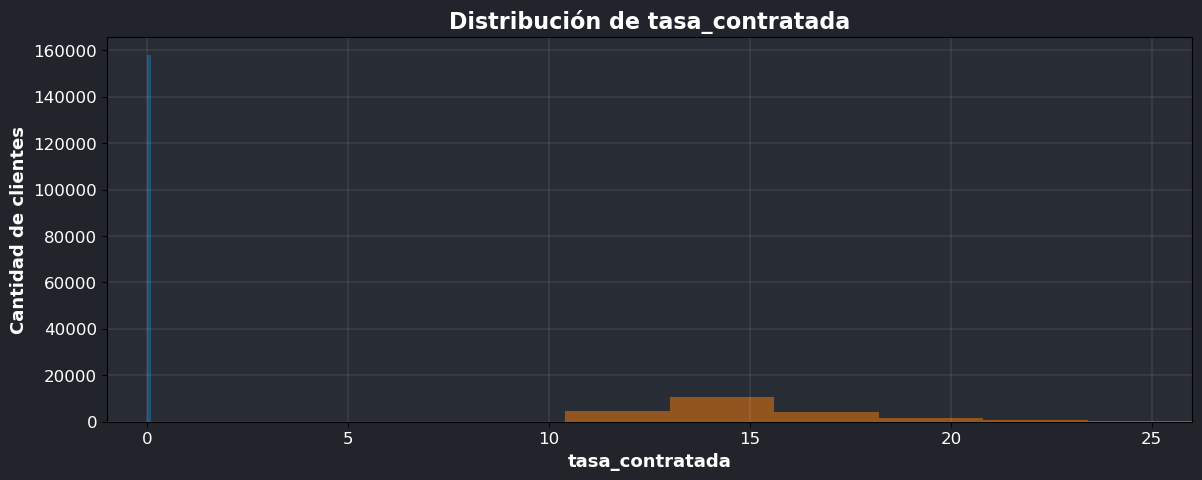

In [89]:

graph_histogram(
    df=df_train,
    column='tasa_contratada', 
    n_bins=10,
    min_value=-1
    # max_value=8
)

In [ ]:
pd.DataFrame(
    round(df_train['alta'].value_counts(normalize=True)*100, 2)
)

,proportion
alta,
0,88.05
1,11.95


In [ ]:
df_train.groupby('alta').agg({
    'tasa_contratada': ['count', 'mean', 'median', 'max', 'min']
})

tasa_contratada                             
               count       mean median   max  min
alta                                             
0             157916   0.000000    0.0   0.0  0.0
1              21424  15.034522   14.7  26.0  0.0

In [ ]:
df_train.query('alta == 1 & tasa_contratada == 0')

,NU_CTE,conteo,EDAD,Salario_final,SCORE_CLEAR,MANTIENE_NOM,max_con,tasa_ofertada,cliente digital,sum_op_digital,mean_importe,m_consultas,m_monetarias,m_nomonetarias,CROSS_SELL,ACTIVO,PASIVO,cross_sell_ahor,tasa_contratada,alta
4079,1173191,173191,38,4101414,886,SI,36900000,12.2,si,16.166667,2.905937e+06,10.000000,6.166667,6.166667,3.0,3983453.0,244285.0,2.0,0.0,1
8799,1133019,133019,38,4054000,923,NO,25900000,20.1,si,7.666667,2.277868e+05,6.333333,1.000000,1.000000,4.0,6016900.0,10727.0,3.0,0.0,1
15533,1103002,103002,32,2476809,904,SI,21300000,13.8,si,19.333333,1.689046e+06,13.000000,4.333333,4.333333,3.0,28047922.0,20239.0,2.0,0.0,1
61162,1223336,223336,27,6587525,851,SI,59300000,15.0,si,39.750000,4.805261e+06,24.250000,14.250000,14.250000,NaN,NaN,NaN,NaN,0.0,1
66515,1126078,126078,37,1473954,887,SI,4400000,16.2,si,12.400000,4.457249e+05,9.800000,2.400000,2.400000,4.0,20900132.0,7659135.0,3.0,0.0,1
85964,1096943,96943,40,6252622,884,SI,56300000,12.2,si,20.500000,2.096666e+06,10.000000,10.500000,10.500000,4.0,40069433.0,1686460.0,3.0,0.0,1
88004,1105242,105242,42,1745319,913,SI,5200000,13.8,si,11.333333,5.307148e+05,6.166667,5.166667,5.166667,1.0,0.0,650098.0,1.0,0.0,1
90333,1201599,201599,33,4413433,903,SI,39700000,12.2,si,26.250000,2.492901e+06,18.250000,8.000000,8.000000,1.0,0.0,1997531.0,1.0,0.0,1
101584,1105870,105870,35,1276198,878,SI,3800000,13.8,si,14.333333,2.367512e+06,9.333333,4.333333,4.333333,2.0,78361.0,124636.0,1.0,0.0,1
129628,1069772,69772,56,2151726,923,SI,14900000,16.1,si,15.000000,2.292958e+06,7.000000,8.000000,8.000000,2.0,466558.0,201689.0,1.0,0.0,1


## **Modelo**

### **Preparación de los datos**

In [28]:
df_train.columns

Index(['NU_CTE', 'conteo', 'EDAD', 'Salario_final', 'SCORE_CLEAR',
       'MANTIENE_NOM', 'max_con', 'tasa_ofertada', 'cliente digital',
       'sum_op_digital', 'mean_importe', 'm_consultas', 'm_monetarias',
       'm_nomonetarias', 'CROSS_SELL', 'ACTIVO', 'PASIVO', 'cross_sell_ahor',
       'tasa_contratada', 'alta'],
      dtype='object')

In [29]:
df_models = df_train[[
    'EDAD', 'Salario_final', 'SCORE_CLEAR', 'MANTIENE_NOM', 'max_con', 'tasa_ofertada', 'cliente digital',
    'sum_op_digital', 'mean_importe', 'm_consultas', 'm_monetarias', 'm_nomonetarias', 'CROSS_SELL', 'ACTIVO', 
    'PASIVO', 'cross_sell_ahor', 'alta'
]].copy()

In [30]:
X = df_models.drop('alta', axis=1)
y = df_models[['alta']]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.3)

In [32]:
df_train = pd.merge(
    X_train.reset_index(),
    y_train.reset_index(),
    how='left'
)

In [45]:
df_train.drop('index', axis=1, inplace=True)

#### **Datos categoricos**

In [46]:
categorical_features = ['MANTIENE_NOM', 'cliente digital']

categorical_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(
        handle_unknown='ignore',
        sparse_output=False,
        drop='first'
    ))
])

In [47]:
# Variables numericas 
numerical_features = ['Salario_final', 'max_con', 'mean_importe','ACTIVO', 'PASIVO']

numerical_transformer = Pipeline(steps=[
    ('standard_scaler', StandardScaler()),
])

In [48]:
# Combinamos nuestros transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical_transformer', categorical_transformer, categorical_features),
        ('numerical_transformer', numerical_transformer, numerical_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=True
)

preprocessor

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('categorical_transformer',
                                 Pipeline(memory=None,
                                          steps=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                feature_name_combiner='concat',
                                                                handle_unknown='ignore',
                                                                max_categories=None,
                                                                min_frequency=None,
                                                                sparse_output=False))],
                                          verbose=False),
                                 ['MANTIENE_NOM', 'cliente digital']),
                                ('numerical_transformer',
                                 Pipeline(memory=None,
                                          steps=[('standard_scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True))],
                                          verbose=False),
                                 ['Salario_final', 'max_con', 'mean_importe',
                                  'ACTIVO', 'PASIVO'])],
                  verbose=False, verbose_feature_names_out=True)

In [49]:
preprocessor.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('categorical_transformer',
                                 Pipeline(memory=None,
                                          steps=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                feature_name_combiner='concat',
                                                                handle_unknown='ignore',
                                                                max_categories=None,
                                                                min_frequency=None,
                                                                sparse_output=False))],
                                          verbose=False),
                                 ['MANTIENE_NOM', 'cliente digital']),
                                ('numerical_transformer',
                                 Pipeline(memory=None,
                                          steps=[('standard_scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True))],
                                          verbose=False),
                                 ['Salario_final', 'max_con', 'mean_importe',
                                  'ACTIVO', 'PASIVO'])],
                  verbose=False, verbose_feature_names_out=True)

In [50]:
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [51]:
model_rf = RandomForestClassifier()

In [52]:
model_rf.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [53]:
y_pred = model_rf.predict(X_test_transformed)
y_pred_proba = model_rf.predict_proba(X_test_transformed)

In [54]:
y_pred_proba = pd.DataFrame(y_pred_proba)[1]

In [55]:
y_probs = model_rf.predict_proba(X_test_transformed)[:, 1]

In [89]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

# Calcular las métricas para cada umbral
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

In [93]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

recall_list = []

# Calcular las métricas para cada umbral
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    recall = recall_score(y_test, y_pred)
    recall_list.append(recall)
    print(f"Threshold: {threshold:.2f} - Recall: {recall:.2f}")

Threshold: 0.10 - Recall: 0.84
Threshold: 0.20 - Recall: 0.63
Threshold: 0.30 - Recall: 0.43
Threshold: 0.40 - Recall: 0.25
Threshold: 0.50 - Recall: 0.11
Threshold: 0.60 - Recall: 0.03
Threshold: 0.70 - Recall: 0.00


In [101]:
# Encontrar el umbral que maximiza el recall
best_threshold = 0.3
print(f"Best threshold for recall: {best_threshold:.2f}")

# Usar el mejor umbral para hacer predicciones
y_pred_best = (y_probs >= best_threshold).astype(int)

Best threshold for recall: 0.30


In [102]:
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

print("Accuracy:", accuracy_score(y_test, y_pred_best))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     47294
           1       0.39      0.43      0.41      6508

    accuracy                           0.85     53802
   macro avg       0.65      0.67      0.66     53802
weighted avg       0.86      0.85      0.85     53802

Accuracy: 0.8478309356529498


<Axes: >

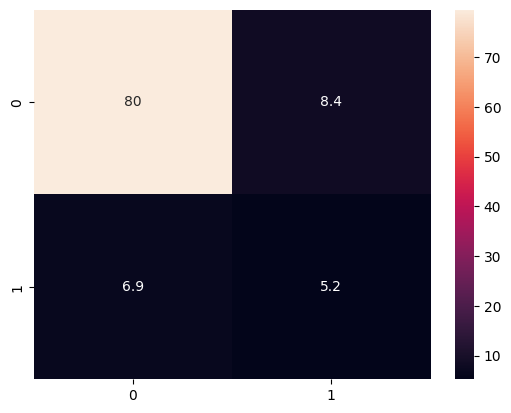

In [106]:
sns.heatmap(
    confusion_matrix(y_pred=y_pred_best, y_true=y_test)/len(y_test)*100,
    annot=True
)

<Axes: >

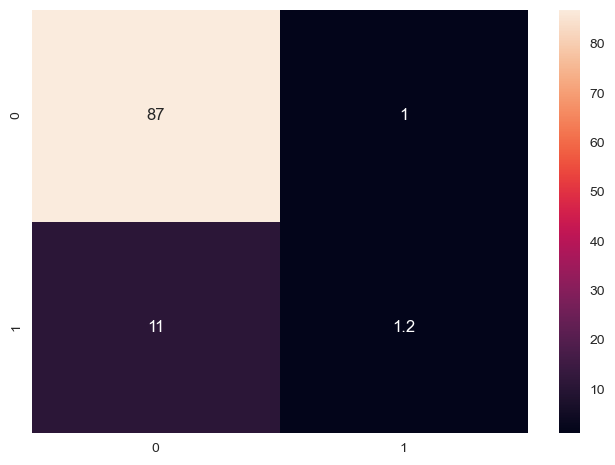

In [56]:
sns.heatmap(
    confusion_matrix(y_pred=y_pred, y_true=y_test)/len(y_test)*100,
    annot=True
)

<Axes: >

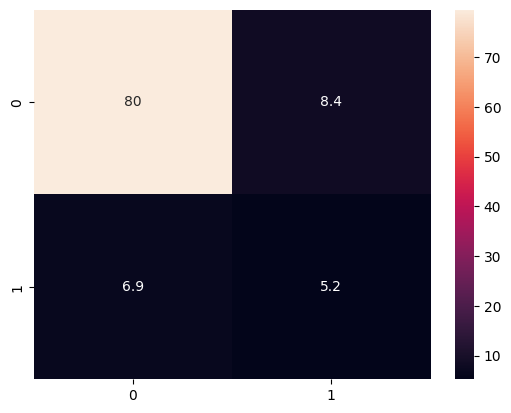

In [ ]:
sns.heatmap(
    confusion_matrix(y_pred=y_pred_best, y_true=y_test)/len(y_test)*100,
    annot=True
)

In [38]:
setup = setup(
    df_train,
    target = 'alta',
    ignore_features=['customerID']
)

,Description,Value
0,Session id,7386
1,Target,alta
2,Target type,Binary
3,Original data shape,"(125538, 17)"
4,Transformed data shape,"(125538, 17)"
5,Transformed train set shape,"(87876, 17)"
6,Transformed test set shape,"(37662, 17)"
7,Ignore features,1
8,Numeric features,14
9,Categorical features,2


In [39]:
best_model = compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.2068,0.5967,0.9721,0.1277,0.2257,0.0199,0.0842,0.2880
qda,Quadratic Discriminant Analysis,0.5485,0.5408,0.4912,0.1375,0.1932,0.0271,0.0371,0.3280
dt,Decision Tree Classifier,0.8168,0.5840,0.2786,0.2534,0.2653,0.1610,0.1612,1.1210
lda,Linear Discriminant Analysis,0.8753,0.7915,0.1050,0.4048,0.1666,0.1238,0.1576,0.4270
rf,Random Forest Classifier,0.8815,0.7987,0.1010,0.5076,0.1683,0.1342,0.1868,9.9940
gbc,Gradient Boosting Classifier,0.8828,0.8166,0.0983,0.5379,0.1660,0.1343,0.1928,16.6350
lightgbm,Light Gradient Boosting Machine,0.8829,0.8171,0.0978,0.5411,0.1655,0.1341,0.1932,1.4830
knn,K Neighbors Classifier,0.8658,0.6371,0.0866,0.2864,0.1329,0.0823,0.0999,5.0880
ada,Ada Boost Classifier,0.8817,0.8101,0.0804,0.5127,0.1388,0.1102,0.1676,3.8210
et,Extra Trees Classifier,0.8810,0.7914,0.0776,0.4932,0.1340,0.1052,0.1596,5.4250


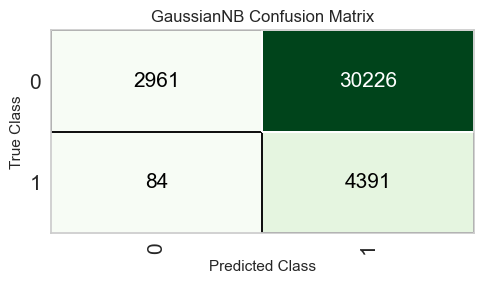

In [40]:
plt.subplots(figsize = (5, 3))
plot_model(best_model, plot='confusion_matrix')